# Wine Quality Data Set
### This project is a part of Coursera and UCSD's Python Data Products Specialization course. The objective is to extract and visualize basic statistics from a dataset. I chose a Wine Quality Data Set from the UCI Machine Learning. 

### Owner - Hritik Panchasara

### Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

### Attribute Information:
    For more information, read [Cortez et al., 2009].
    Input variables (based on physicochemical tests):
        1 - fixed acidity
        2 - volatile acidity
        3 - citric acid
        4 - residual sugar
        5 - chlorides
        6 - free sulfur dioxide
        7 - total sulfur dioxide
        8 - density
        9 - pH
        10 - sulphates
        11 - alcohol
        Output variable (based on sensory data):
        12 - quality (score between 0 and 10)



In [8]:
# importing libraries and reading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

labels = ('fixed_activity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality')
df_white = pd.read_csv('winequality-white.csv', header = 0, names = labels, sep = ';')
df_red = pd.read_csv('winequality-red.csv', header = 0, names = labels, sep = ';')

### The two dataframes above store all the relevant data and attributes regarding white and red vine samples. I created my own labels based on attribute names and created my own pandas dataframe. Both these datasets can be compared to find out how wine qualities are affected with physiochemical test values.

In [6]:
df_white.head()

,fixed_activity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
df_red.head()

,fixed_activity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df_white.describe()

,fixed_activity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
df_red.describe()

,fixed_activity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### We can append both datasets into a single dataframe that will allow us to compare statistics. First, we need to append color attributes for both dataframes, after which we can merge them both.

In [12]:
df_red['color'] = 'red'
df_white['color'] = 'white'

# appending dataframes
df_wine = df_red.append(df_white)
df_wine.head()

,fixed_activity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### We can now identify how the wine quality is affected by different attributes such as pH, residual sugar, volatile acidity, alcohol content, total sulfur dioxide or citric acid. We can assess more feature attributes and how it can impact the quality of wine.

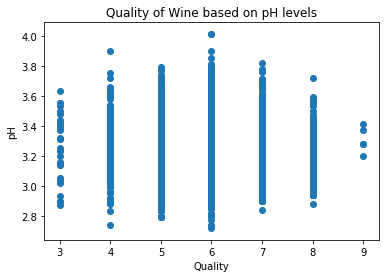

In [21]:
x = df_wine.quality
y = df_wine.pH
plt.xlabel("Quality")
plt.ylabel("pH")
plt.title("Quality of Wine based on pH levels")
plt.scatter(x,y)

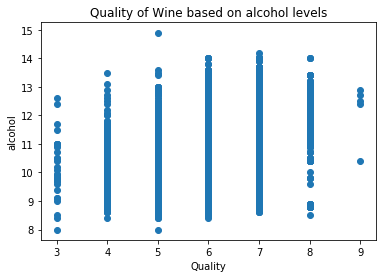

In [24]:
x = df_wine.quality
y = df_wine.alcohol
plt.xlabel("Quality")
plt.ylabel("alcohol")
plt.title("Quality of Wine based on alcohol levels")
plt.scatter(x,y)

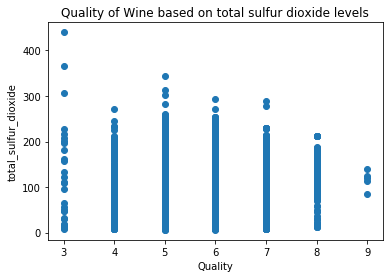

In [25]:
x = df_wine.quality
y = df_wine.total_sulfur_dioxide
plt.xlabel("Quality")
plt.ylabel("total_sulfur_dioxide")
plt.title("Quality of Wine based on total sulfur dioxide levels")
plt.scatter(x,y)

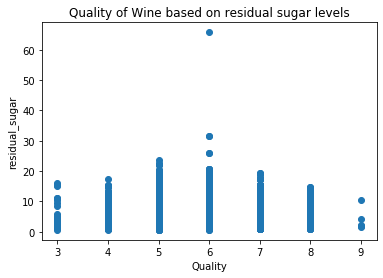

In [27]:
x = df_wine.quality
y = df_wine.residual_sugar
plt.xlabel("Quality")
plt.ylabel("residual_sugar")
plt.title("Quality of Wine based on residual sugar levels")
plt.scatter(x,y)

### We can see that alcohol clearly has a higher effect on the quality of wine than other feature attributes